## Q1. Dataset description.
### The dataset I chose is the "Breast Cancer Wisconsin Data Set". These are clinical cases reported by Dr. Wolberg in University of Wisconsin Hospitals. It contains 10 features and 699 instances. The 10 features are: sample id number, clump thickness, uniformity of cell size, uniformity of cell shape, marginal adhesion, single epithelial cell size, bare nuclei, bland chromatin, normal nucleoli, and mitoses. And there are 2 classes: benign and malignant.

## Q2. Dataset analysis.
### All the 10 features are integers. Except the id number, all the other 9 features are in the range of 1-10. The class is also represented as integer, 2 for benign, and 4 for malignant. There are missing data for the feature of "bare_nuclei", and they are orignially encoded as '?'.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
cancer = pd.read_csv(fileURL, names=['id', 'clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape', 
                                   'marginal_adhesion', 'SE_cell_size', 'bare_nuclei', 'bland_chromatin',
                                  'normal_nucleoli', 'mitoses', 'class'], header=None)

In [3]:
cancer.head()

,id,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,SE_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
cancer.dtypes

id                        int64
clump_thickness           int64
uniformity_cell_size      int64
uniformity_cell_shape     int64
marginal_adhesion         int64
SE_cell_size              int64
bare_nuclei              object
bland_chromatin           int64
normal_nucleoli           int64
mitoses                   int64
class                     int64
dtype: object

In [5]:
cancer.bare_nuclei.value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

In [6]:
cancer.bare_nuclei = cancer.bare_nuclei.replace('?', 1)
cancer.bare_nuclei = cancer.bare_nuclei.astype(int)
cancer.dtypes

id                       int64
clump_thickness          int64
uniformity_cell_size     int64
uniformity_cell_shape    int64
marginal_adhesion        int64
SE_cell_size             int64
bare_nuclei              int64
bland_chromatin          int64
normal_nucleoli          int64
mitoses                  int64
class                    int64
dtype: object

Populating the interactive namespace from numpy and matplotlib


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10cbfe650>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x112e7e610>]], dtype=object)

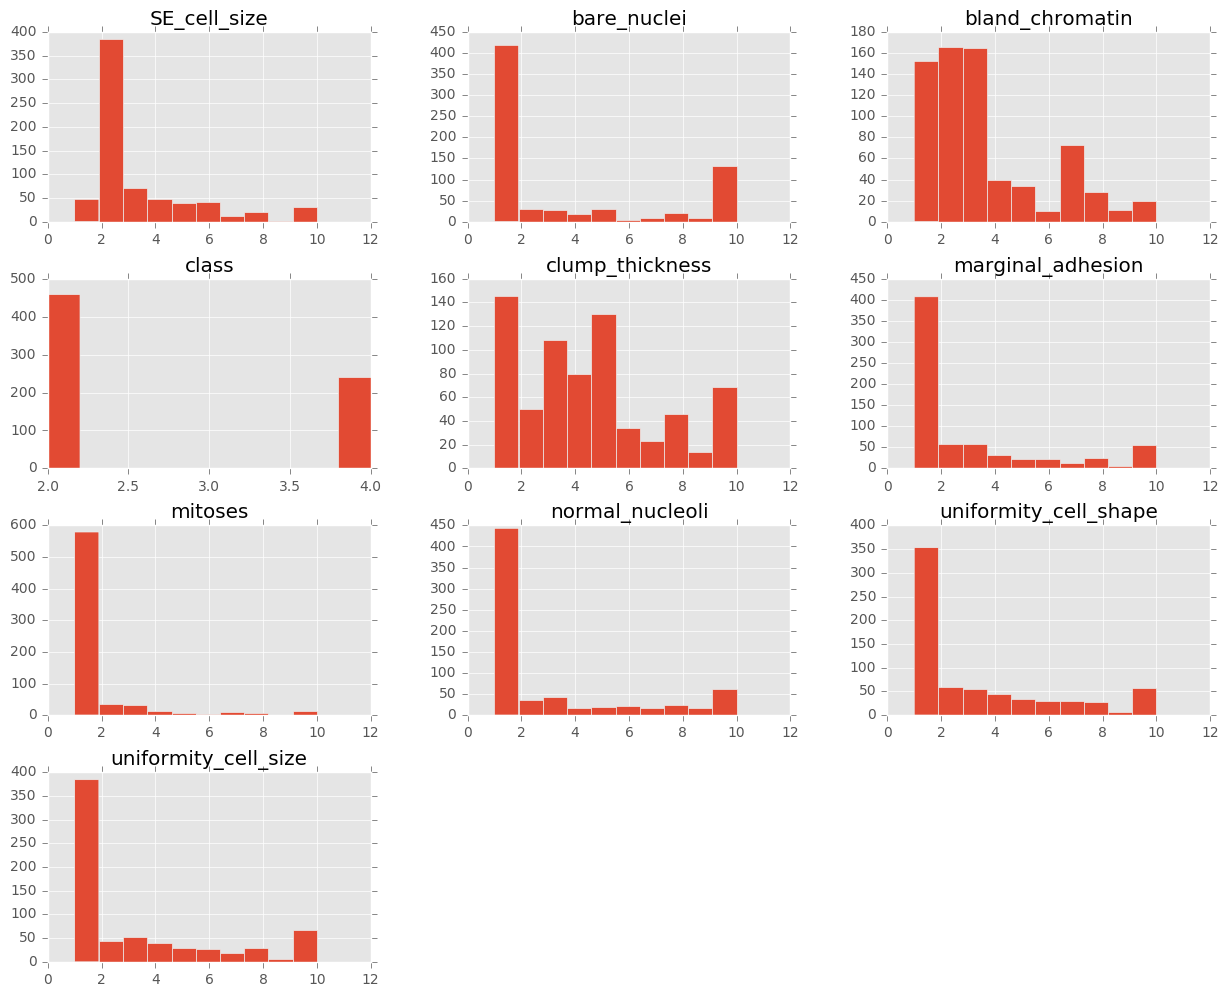

In [7]:
%pylab inline
matplotlib.style.use('ggplot')
cancer.ix[:, 1:11].hist(figsize=(15,12))

## Q3. DecisionTreeClassifier

In [8]:
data = cancer.iloc[:,1:10]
data.head()
data = data.as_matrix()

In [9]:
label = cancer['class']
label = label.as_matrix()

In [10]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=7)
clf = clf.fit(data, label)

## Q4. Visiualization of the tree

In [11]:
feature_names = ['clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape', 'marginal_adhesion', 
                 'SE_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses']
label_names = ['benign', 'malignant']

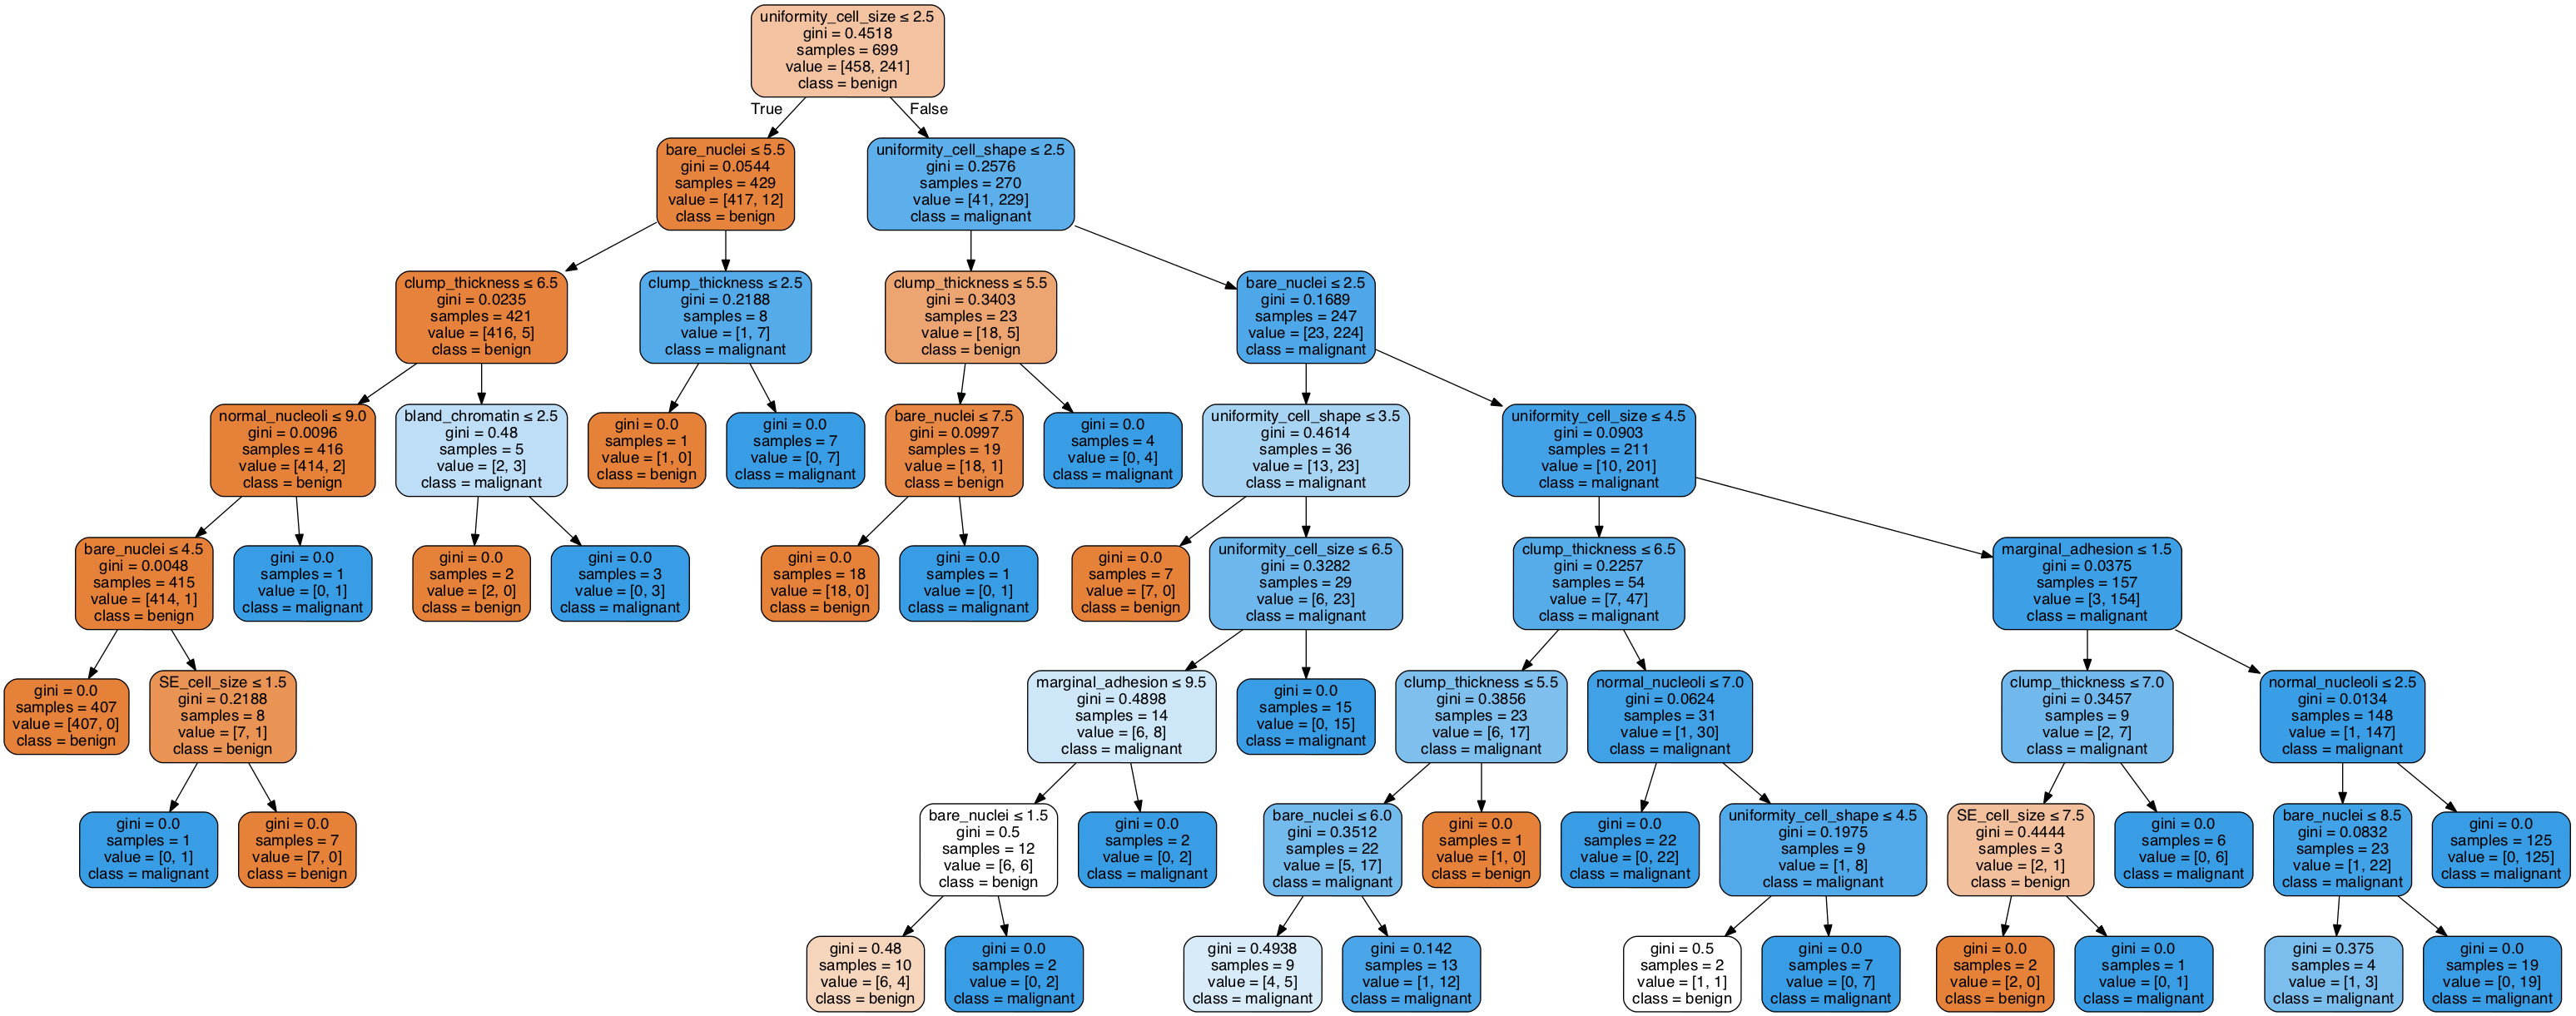

In [12]:
import pydotplus
from IPython.display import Image
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_names, class_names=label_names, filled=True,
                               rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Q5. Prediction and analysis

In [13]:
X = np.array([[6, 3, 3, 5, 3, 3, 4, 2, 2]])
clf.predict_proba(X)

array([[ 1.,  0.]])

#### The above instance was classified as benign according to the following assignment procedure: 
1. uniformality_cell_size > 2.5
2. uniformality_cell_shape > 2.5
3. bare_nuclei > 2.5
4. uniformality_cell_size <= 4.5
5. clump_thickness <= 6.5
6. clump_thickness > 5.5

#### The classification does not make much sense to me. By comparing the mean value of each feature for benign and malignant samples (statistics as shown below), it shows that malignant samples tend to have larger values for these features.

In [14]:
malignant = cancer[cancer['class']==4]
benign = cancer[cancer['class']==2]

In [15]:
malignant.iloc[:,1:10].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
clump_thickness,241.0,7.195021,2.428849,1.0,5.0,8.0,10.0,10.0
uniformity_cell_size,241.0,6.572614,2.719512,1.0,4.0,6.0,10.0,10.0
uniformity_cell_shape,241.0,6.560166,2.562045,1.0,4.0,6.0,9.0,10.0
marginal_adhesion,241.0,5.547718,3.210465,1.0,3.0,5.0,8.0,10.0
SE_cell_size,241.0,5.298755,2.451606,1.0,3.0,5.0,6.0,10.0
bare_nuclei,241.0,7.572614,3.161605,1.0,5.0,10.0,10.0,10.0
bland_chromatin,241.0,5.979253,2.273852,1.0,4.0,7.0,7.0,10.0
normal_nucleoli,241.0,5.863071,3.350672,1.0,3.0,6.0,10.0,10.0
mitoses,241.0,2.589212,2.557939,1.0,1.0,1.0,3.0,10.0


In [16]:
benign.iloc[:,1:10].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
clump_thickness,458.0,2.956332,1.674318,1.0,1.0,3.0,4.0,8.0
uniformity_cell_size,458.0,1.325328,0.907694,1.0,1.0,1.0,1.0,9.0
uniformity_cell_shape,458.0,1.443231,0.997836,1.0,1.0,1.0,1.0,8.0
marginal_adhesion,458.0,1.364629,0.996830,1.0,1.0,1.0,1.0,10.0
SE_cell_size,458.0,2.120087,0.917130,1.0,2.0,2.0,2.0,10.0
bare_nuclei,458.0,1.336245,1.161206,1.0,1.0,1.0,1.0,10.0
bland_chromatin,458.0,2.100437,1.080339,1.0,1.0,2.0,3.0,7.0
normal_nucleoli,458.0,1.290393,1.058856,1.0,1.0,1.0,1.0,9.0
mitoses,458.0,1.063319,0.501995,1.0,1.0,1.0,1.0,8.0


#### Given the test instance, I would predict it to be maglinant. Yet, it was predicted as benign according to the decision tree. This is the result of overfitting. Therefore, I reduced the max_depth to be 5, and re-train the tree. With the new model, the given test instance was predicted to be malignant with a probability of 0.74.

In [17]:
clf2 = tree.DecisionTreeClassifier(max_depth=5)
clf2 = clf2.fit(data, label)
clf2.predict_proba(X)

array([[ 0.26086957,  0.73913043]])

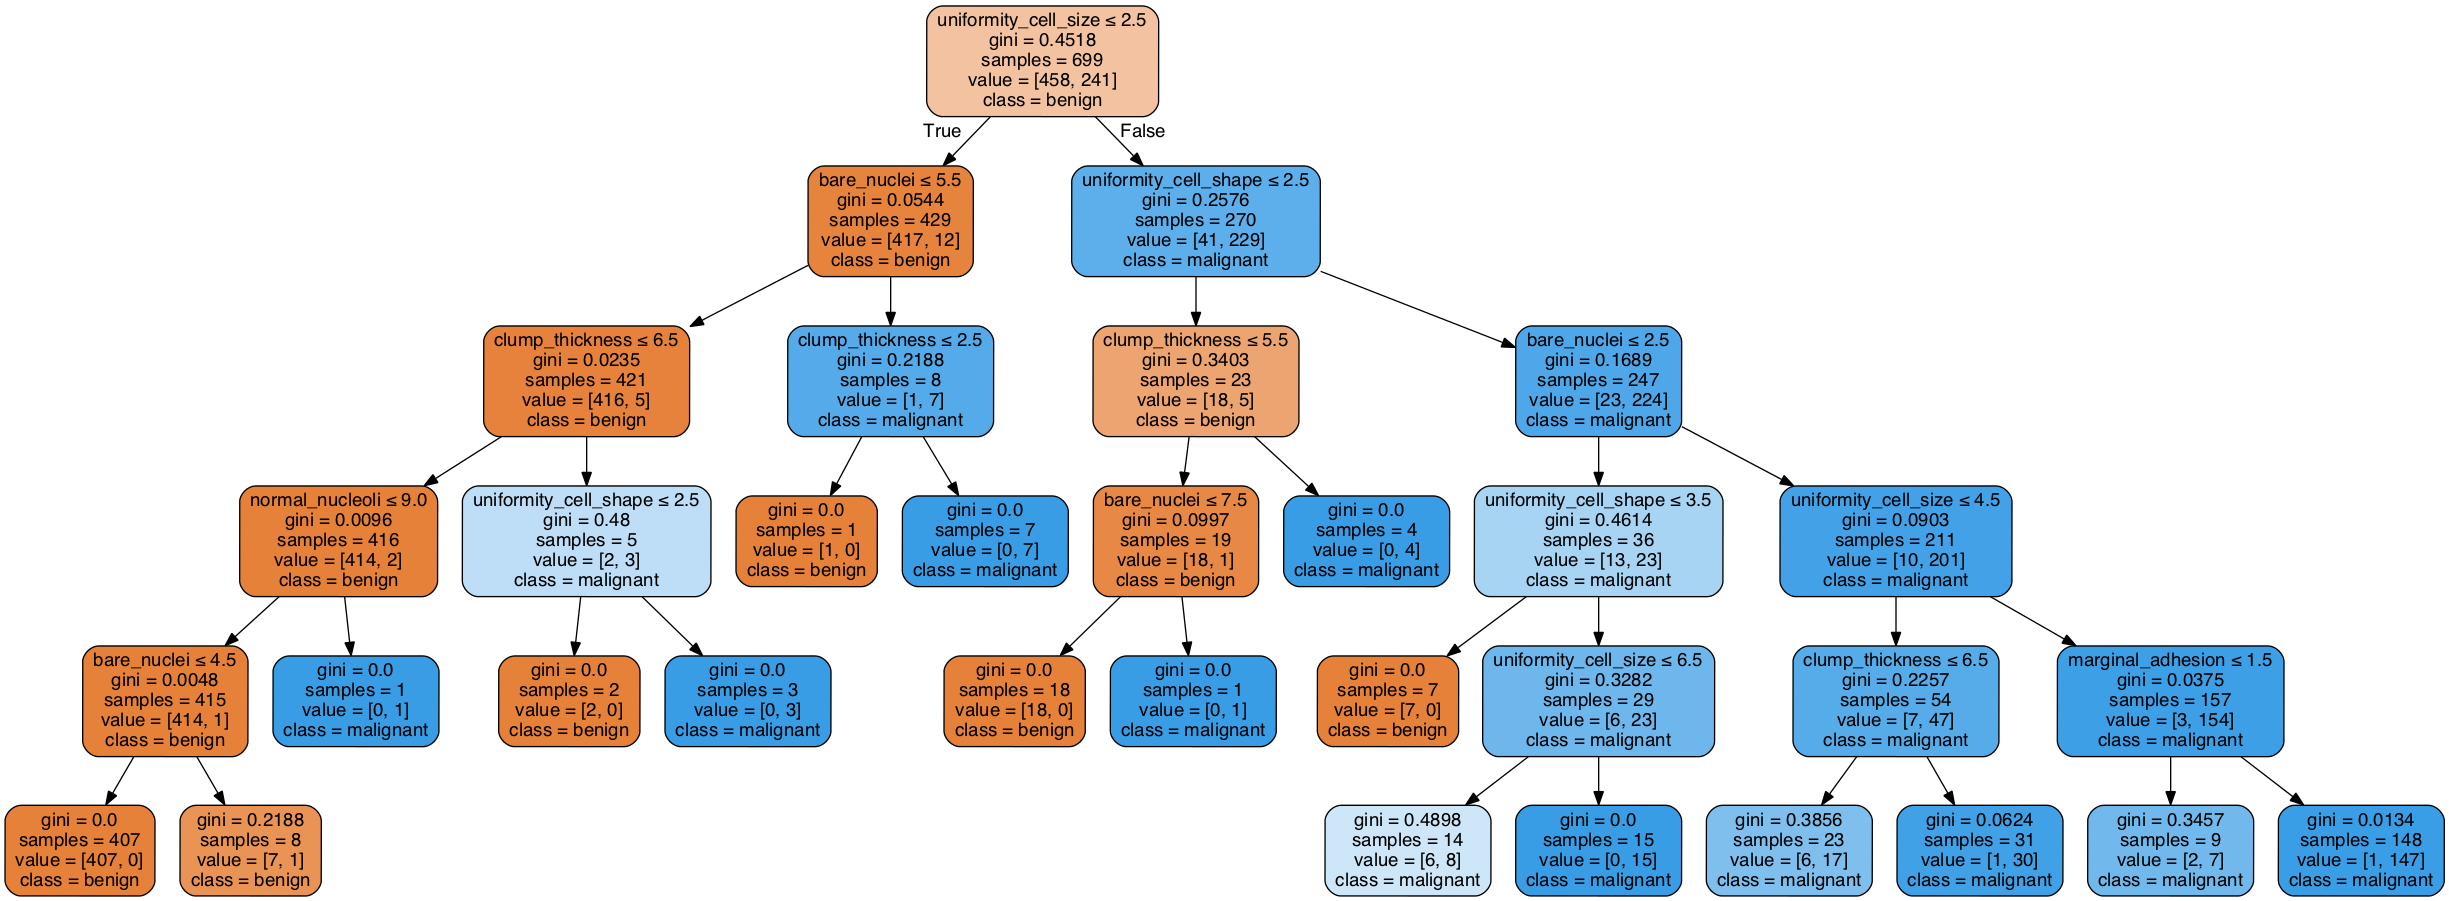

In [18]:
dot_data2 = tree.export_graphviz(clf2, out_file=None, feature_names=feature_names, class_names=label_names, filled=True,
                               rounded=True, special_characters=True)
graph2 = pydotplus.graph_from_dot_data(dot_data2)
Image(graph2.create_png())